# Predicting IMDB movie ratings

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_rolling_average is the result of preprocessing several IMDB files

In [2]:
df = pd.read_csv('df_rolling_average.csv',sep = '\t',index_col=0, encoding='utf-8')

In [3]:
df.shape

(12546, 90)

In [4]:
df = df.sort_values(["YE"], ascending=[1])

In [5]:
df.reset_index(level=0,inplace=True)

In [6]:
rating = ['RATING']
reordered = rating + [c for c in df.columns if c not in rating]
df = df[reordered]

In [7]:
df.head()

,RATING,MV,YE,DI,AC1,AC2,AC3,AC4,AC1_SEX,AC2_SEX,...,AC3_AVE,AC4_AVE,AC1_CAR,AC2_CAR,AC3_CAR,AC4_CAR,AC1_EXP,AC2_EXP,AC3_EXP,AC4_EXP
0,7.7,Le voyage à travers l'impossible,1904.0,"Méliès, Georges","Méliès, Georges",NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1
1,7.2,Tillie's Punctured Romance,1914.0,"Sennett, Mack","Dressler, Marie","Chaplin, Charles","Normand, Mabel","Swain, Mack",1.0,0.0,...,0.0,0.0,2.0,10.0,1.0,3.0,1,1,1,1
2,6.7,Cabiria,1914.0,"Pastrone, Giovanni","Catena, Carolina","Quaranta, Lidia","Marangoni, Gina","Testa, Dante",1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1,1,1,1
3,7.2,Gertie the Dinosaur,1914.0,"McCay, Winsor","McCay, Winsor","McManus, George","McCardell, Roy L.",NaN,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1,1,1,1
4,6.8,The Birth of a Nation,1915.0,"Griffith, D.W. (I)","Gish, Lillian","Marsh, Mae","Walthall, Henry B.","Cooper, Miriam (I)",1.0,1.0,...,0.0,0.0,6.0,1.0,1.0,1.0,1,1,1,1


In [8]:
df.corr()

,RATING,YE,AC1_SEX,AC2_SEX,AC3_SEX,AC4_SEX,Drama,YE.1,Horror,CO,...,AC3_AVE,AC4_AVE,AC1_CAR,AC2_CAR,AC3_CAR,AC4_CAR,AC1_EXP,AC2_EXP,AC3_EXP,AC4_EXP
RATING,1.000000,-0.285755,-0.034285,-0.007253,-0.010079,-0.028325,0.306428,-0.285755,-0.266133,-0.242897,...,-0.054774,-0.078051,0.006980,-0.002689,-0.016840,-0.031957,0.072711,0.077755,0.069416,0.087551
YE,-0.285755,1.000000,0.031143,-0.042411,0.031895,0.020927,0.018908,1.000000,0.024441,0.585424,...,0.114763,0.139011,-0.081503,-0.019820,0.023876,0.052073,-0.043352,-0.111556,-0.133827,-0.153021
AC1_SEX,-0.034285,0.031143,1.000000,-0.170278,0.011892,0.051418,0.083674,0.031143,0.067145,-0.004268,...,-0.014646,-0.012983,-0.173254,-0.005447,-0.030226,-0.034560,0.082323,0.029483,0.014119,0.014704
AC2_SEX,-0.007253,-0.042411,-0.170278,1.000000,-0.101589,-0.029060,0.027159,-0.042411,0.036363,-0.034036,...,0.025989,0.008835,0.033219,-0.109182,0.043229,0.007759,-0.022432,0.042005,-0.023757,-0.008318
AC3_SEX,-0.010079,0.031895,0.011892,-0.101589,1.000000,-0.005355,0.034089,0.031895,0.004077,0.017343,...,-0.044827,0.026484,0.012393,0.040783,-0.071189,0.023575,-0.020518,-0.034905,0.042390,-0.027382
AC4_SEX,-0.028325,0.020927,0.051418,-0.029060,-0.005355,1.000000,0.028516,0.020927,0.016280,0.026008,...,0.021551,-0.040448,-0.010013,0.006101,0.014124,-0.067450,-0.004843,-0.007081,-0.020842,0.039417
Drama,0.306428,0.018908,0.083674,0.027159,0.034089,0.028516,1.000000,0.018908,-0.257101,-0.065268,...,0.023008,0.000344,0.045075,0.034601,0.048780,0.025190,-0.021908,0.000024,-0.019387,0.004095
YE.1,-0.285755,1.000000,0.031143,-0.042411,0.031895,0.020927,0.018908,1.000000,0.024441,0.585424,...,0.114763,0.139011,-0.081503,-0.019820,0.023876,0.052073,-0.043352,-0.111556,-0.133827,-0.153021
Horror,-0.266133,0.024441,0.067145,0.036363,0.004077,0.016280,-0.257101,0.024441,1.000000,0.011079,...,-0.081404,-0.057073,-0.148739,-0.131886,-0.112596,-0.090769,0.122277,0.107073,0.078937,0.056096
CO,-0.242897,0.585424,-0.004268,-0.034036,0.017343,0.026008,-0.065268,0.585424,0.011079,1.000000,...,0.058591,0.069511,0.026616,0.049343,0.042197,0.049971,-0.052679,-0.070327,-0.068790,-0.075887


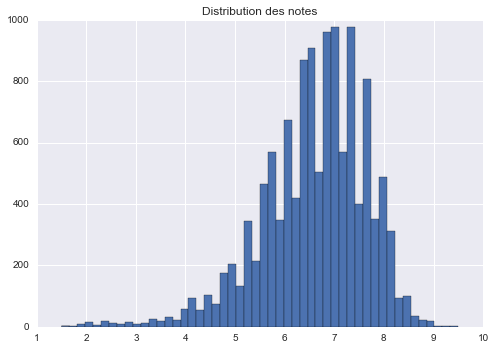

In [167]:
plt.title('Rating distribution')
df.RATING.hist(bins = 50)

In [168]:
df.RATING.describe()

count    12546.000000
mean         6.588865
std          1.056916
min          1.500000
25%          6.000000
50%          6.700000
75%          7.300000
max          9.500000
Name: RATING, dtype: float64

In [9]:
mean1 = df[df.Drama==1].RATING.mean()
mean2 = df[df.Drama==0].RATING.mean()
mean1,mean2

(6.861071817192603, 6.203561802079311)

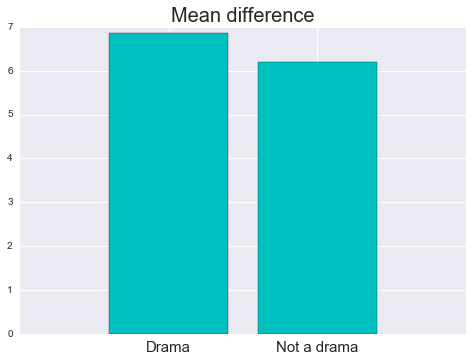

In [10]:
plt.figure()
plt.title("Mean difference", fontsize =20)
plt.bar(range(0,2), [mean1, mean2],color="c", align="center")
plt.xticks(range(0,2),["Drama", "Not a drama"], fontsize =15)
plt.xlim([-1, 2])
plt.show()

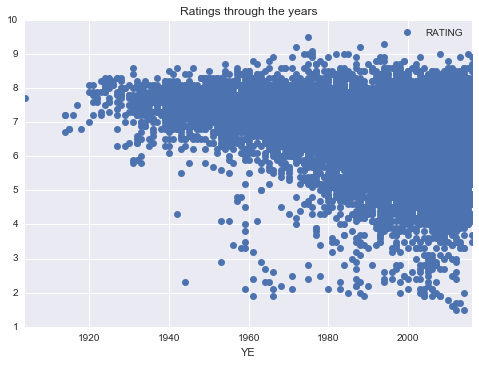

In [11]:
df.plot("YE","RATING", style = 'o', title = "Ratings through the years",)

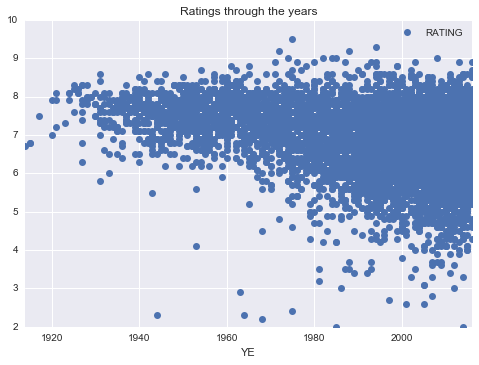

In [12]:
df.loc[df.Drama==1].plot("YE","RATING", style = 'o', title = "Ratings through the years",)

In [16]:
def plot_correlation_matrix(dataset):
    corr = dataset.corr()
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, vmax=.3,
                square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

AC1_SEX : 1 if the first credited actor is male, 0 if female

DI_AVE : Average of the ratings of the 3 previous movies of the director, if available, 0 else

DI_CAR : Number of movies a director has made

DI_EXP : 1 if the director has made less than 3 movies before, 0 else

In [17]:
artists = ['RATING', 'AC1_SEX','AC2_SEX', 'AC3_SEX', 'AC4_SEX', 'DI_AVE', 'DI_CAR', 'DI_EXP',
           'AC1_AVE', 'AC2_AVE', 'AC3_AVE', 'AC4_AVE', 'AC1_CAR', 'AC2_CAR',
           'AC3_CAR', 'AC4_CAR', 'AC1_EXP', 'AC2_EXP', 'AC3_EXP', 'AC4_EXP']

In [18]:
genres = ['RATING', 'Drama', 'Horror', 'Sci-Fi', 'Action', 'Thriller', 'Biography', 
           'Comedy', 'War', 'History', 'Romance', 'Fantasy', 'Animation', 'CO']

In [19]:
keywords = ['RATING', 'singing', 'sequel', 'marriage',
       'based-on-novel', 'train', 'singer', 'song', 'friendship',
       'husband-wife-relationship', 'drinking',
       'world-war-two', 'independent-film',
       'telephone-call', 'mother-son-relationship',
       'family-relationships', 'based-on-play', 
       'father-son-relationship', 'friend', 'love', 'photograph',
       'cigarette-smoking', 'dancing', 'martial-arts', 'children',
       'jealousy', 'death', 'suicide', 'boy', 'pistol',
       'surrealism', 'adultery', 'prison', 'doctor', 'kiss',
       'mother-daughter-relationship', 'infidelity', 'horse',
       'bare-chested-male', 'gun', 'number-in-title',
       'bare-breasts','father-daughter-relationship',
       'brother-sister-relationship', 'teenager', 'explosion',
       'brother-brother-relationship']

In [20]:
countries = ['RATING', 'USA', 'France', 'Canada','Italy']

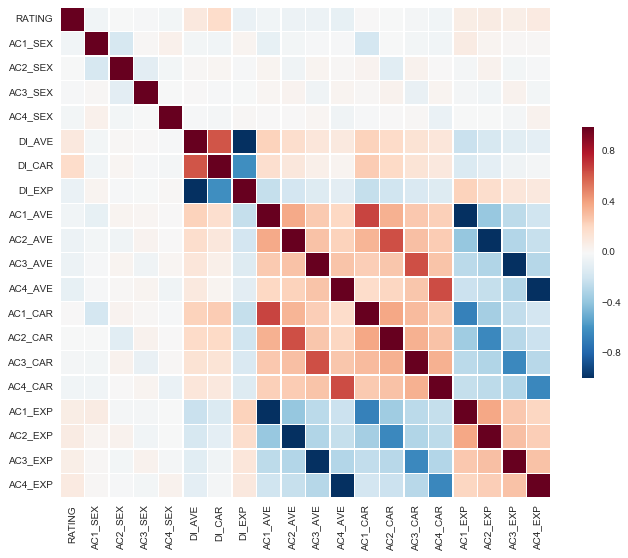

In [21]:
plot_correlation_matrix(df[artists])

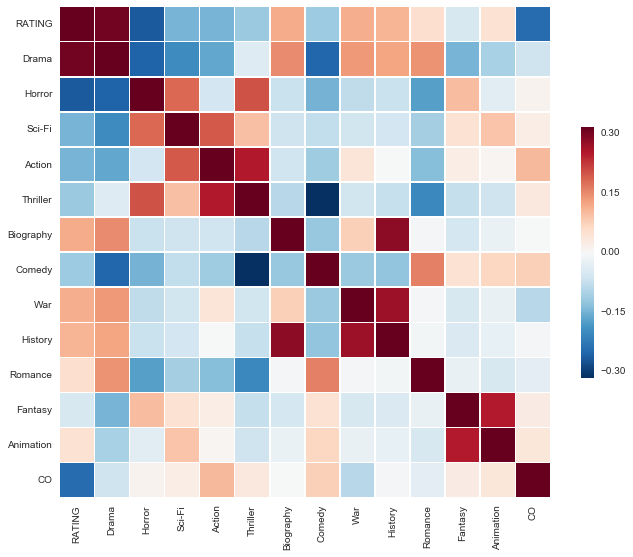

In [22]:
plot_correlation_matrix(df[genres])

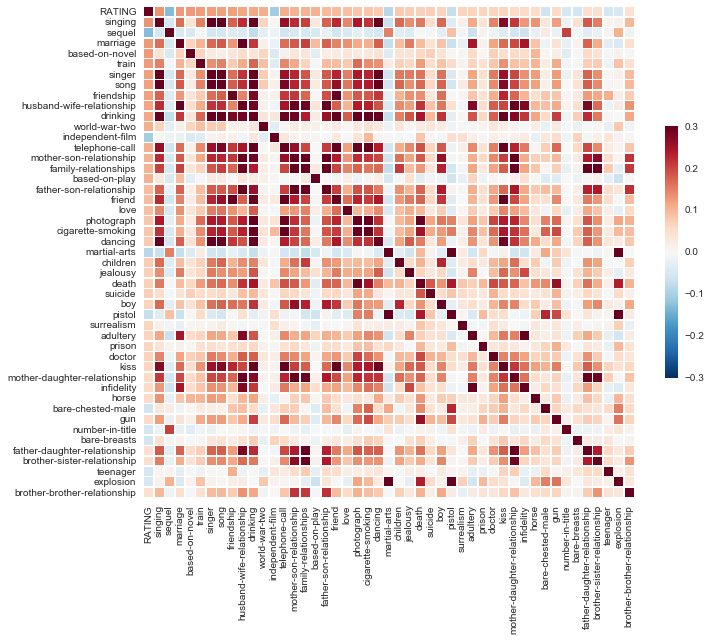

In [23]:
plot_correlation_matrix(df[keywords])

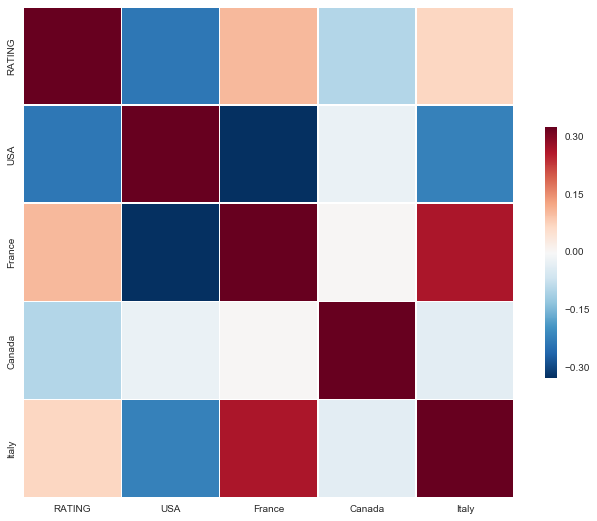

In [24]:
plot_correlation_matrix(df[countries])

In [25]:
df1,df2 = df[:2*len(df)//3], df[2*len(df)//3+1:]

In [26]:
df2.reset_index(level=0,drop=True,inplace=True)

In [27]:
names = df.columns.values

In [28]:
names

array(['RATING', 'MV', 'YE', 'DI', 'AC1', 'AC2', 'AC3', 'AC4', 'AC1_SEX',
       'AC2_SEX', 'AC3_SEX', 'AC4_SEX', 'Drama', 'YE.1', 'Horror', 'CO',
       'USA', 'Sci-Fi', 'Action', 'singing', 'sequel', 'marriage',
       'based-on-novel', 'train', 'singer', 'song', 'friendship',
       'Thriller', 'Biography', 'husband-wife-relationship', 'drinking',
       'Comedy', 'War', 'world-war-two', 'independent-film',
       'telephone-call', 'History', 'France', 'mother-son-relationship',
       'family-relationships', 'based-on-play', 'Canada',
       'father-son-relationship', 'friend', 'love', 'photograph',
       'cigarette-smoking', 'dancing', 'martial-arts', 'children',
       'jealousy', 'death', 'suicide', 'Italy', 'boy', 'pistol',
       'surrealism', 'adultery', 'prison', 'doctor', 'kiss',
       'mother-daughter-relationship', 'infidelity', 'horse',
       'bare-chested-male', 'gun', 'number-in-title', 'Fantasy',
       'bare-breasts', 'Romance', 'father-daughter-relationship',
   

In [156]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.tree import export_graphviz
from subprocess import check_call
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
from xgboost import to_graphviz

## 2.1. Learning

The training data will be split using TimeSeriesSplit on the last third of the data.

In [123]:
tscv = TimeSeriesSplit(n_splits=10)

In [124]:
def score(reg, X, y):
    y_predicted = np.array([])
    y_tested = np.array([])
    X1,X2 = X[:2*len(X)//3], X[2*len(X)//3+1:]
    X2.reset_index(level=0, drop = True, inplace=True)
    y1,y2 = y[:2*len(X)//3], y[2*len(X)//3+1:]
    y2.reset_index(level=0, drop = True, inplace=True)
    for train_index, test_index in tscv.split(X2):
        X_train = pd.concat([X1,X2.loc[train_index]])[names[8:]]
        y_train = pd.concat([y1,y2.loc[train_index]])
        X_test = X2.loc[test_index]
        y_test = y2.loc[test_index]
        reg.fit(X_train, y_train)
        y_predicted = np.concatenate([y_predicted, reg.predict(X_test)])
        y_tested = np.concatenate([y_tested, np.array(y_test)])
    return r2_score(y_tested,y_predicted)

## 2.2. Linear Regression

In [138]:
reg = linear_model.LinearRegression()

In [139]:
score(reg,df.ix[:,8:],df.RATING)

0.29840391110874009

In [140]:
def coef_interpretation(variables,coef):
    l=[]
    for i in range(len(coef)):
        l.append({variables[i]:coef[i]})
    return l        

In [141]:
coef_interpretation(names[8:],reg.coef_)

[{'AC1_SEX': -0.12607379679139527},
 {'AC2_SEX': -0.064926149386456522},
 {'AC3_SEX': -0.036577196233265323},
 {'AC4_SEX': -0.056783375727131477},
 {'Drama': 0.28533574774733195},
 {'YE.1': -0.0073605971640056892},
 {'Horror': -0.52885415589870821},
 {'CO': -0.22355800873026871},
 {'USA': -0.44403262096494789},
 {'Sci-Fi': -0.17104212496208521},
 {'Action': -0.20442121209007169},
 {'singing': 0.082877195254044356},
 {'sequel': -0.19668323657502051},
 {'marriage': 0.030672114340468355},
 {'based-on-novel': 0.029445588133412887},
 {'train': 0.089469857415663726},
 {'singer': -0.024566504075561442},
 {'song': -0.018832730237222393},
 {'friendship': 0.17572122718074298},
 {'Thriller': -0.086501307626373952},
 {'Biography': 0.23590200349217924},
 {'husband-wife-relationship': 0.061556636779282352},
 {'drinking': -0.086323234078439171},
 {'Comedy': -0.10929799451180408},
 {'War': -0.028690722744939539},
 {'world-war-two': 0.0053824891027268555},
 {'independent-film': -0.14013616969484013},
 

In [142]:
def test(reg):
    y_predicted = np.array([])
    y_tested = np.array([])
    for train_index, test_index in tscv.split(df2):
        X_train = pd.concat([df1.ix[:,8:],df2.ix[:,8:].loc[train_index]])[names[8:]]
        y_train = pd.concat([df1.RATING,df2.RATING.loc[train_index]])
        X_test = df2.ix[:,8:].loc[test_index]
        y_test = df2.RATING.loc[test_index]
        reg.fit(X_train, y_train)
        y_predicted = np.concatenate([y_predicted, reg.predict(X_test)])
        y_tested = np.concatenate([y_tested, np.array(y_test)])
    return y_tested,y_predicted

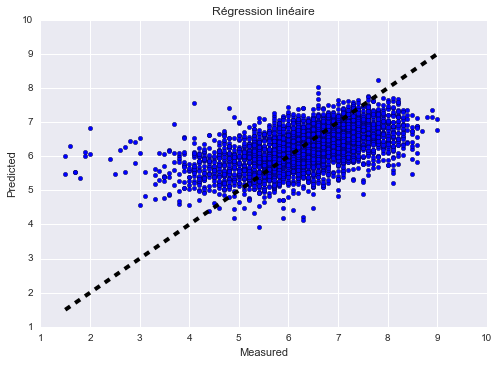

In [144]:
y_tested,y_predicted =  test(reg)
fig, ax = plt.subplots()
ax.scatter(y_tested, y_predicted)
ax.plot([y_tested.min(), y_tested.max()], [y_tested.min(), y_tested.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

## 2.3. Random Forrest

In [72]:
reg = RandomForestRegressor()

In [36]:
#######################

In [37]:
parameters = {"n_estimators" : [5,10,15,20,30,40,50], "max_depth" : [5,10,15,20,30,40,50]}

In [38]:
clf = GridSearchCV(estimator=reg, param_grid=parameters, scoring = score, verbose = 2)

In [39]:
clf.fit(df.ix[:,8:],df.RATING)        

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] n_estimators=5, max_depth=5 .....................................
[CV] ............................ n_estimators=5, max_depth=5 -   0.6s
[CV] n_estimators=5, max_depth=5 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ............................ n_estimators=5, max_depth=5 -   0.6s
[CV] n_estimators=5, max_depth=5 .....................................
[CV] ............................ n_estimators=5, max_depth=5 -   0.6s
[CV] n_estimators=10, max_depth=5 ....................................
[CV] ........................... n_estimators=10, max_depth=5 -   1.0s
[CV] n_estimators=10, max_depth=5 ....................................
[CV] ........................... n_estimators=10, max_depth=5 -   1.1s
[CV] n_estimators=10, max_depth=5 ....................................
[CV] ........................... n_estimators=10, max_depth=5 -   1.0s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] ........................... n_estimators=15, max_depth=5 -   1.5s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] ........................... n_estimators=15, max_depth=5 -   1.6s
[CV] n_estimators=15, max_depth=5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed: 59.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 30, 40, 50], 'max_depth': [5, 10, 15, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function score at 0x000000CE41489510>, verbose=2)

In [40]:
clf.best_score_, clf.best_estimator_

(0.33305003960501356,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))

In [41]:
parameters2 = {"n_estimators" : [30,40,50,60,70], "max_depth" : [5,10,15,20,30,40,50]}

In [42]:
clf = GridSearchCV(estimator=reg, param_grid=parameters2, scoring = score, verbose = 2)

In [43]:
clf.fit(df.ix[:,8:],df.RATING)        

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] n_estimators=30, max_depth=5 ....................................
[CV] ........................... n_estimators=30, max_depth=5 -   7.4s
[CV] n_estimators=30, max_depth=5 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV] ........................... n_estimators=30, max_depth=5 -   3.4s
[CV] n_estimators=30, max_depth=5 ....................................
[CV] ........................... n_estimators=30, max_depth=5 -   2.9s
[CV] n_estimators=40, max_depth=5 ....................................
[CV] ........................... n_estimators=40, max_depth=5 -   4.7s
[CV] n_estimators=40, max_depth=5 ....................................
[CV] ........................... n_estimators=40, max_depth=5 -   5.1s
[CV] n_estimators=40, max_depth=5 ....................................
[CV] ........................... n_estimators=40, max_depth=5 -   3.9s
[CV] n_estimators=50, max_depth=5 ....................................
[CV] ........................... n_estimators=50, max_depth=5 -  19.1s
[CV] n_estimators=50, max_depth=5 ....................................
[CV] ........................... n_estimators=50, max_depth=5 -  19.8s
[CV] n_estimators=50, max_depth=5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed: 329.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [5, 10, 15, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function score at 0x000000CE41489510>, verbose=2)

In [44]:
clf.best_score_, clf.best_estimator_

(0.33945963578353539,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))

In [85]:
parameters3 = {"n_estimators" : [30,40,50], "max_depth" : [15,20,30,40], "min_samples_leaf" : [2,3,4,5]}

In [75]:
clf = GridSearchCV(estimator=reg, param_grid=parameters3, scoring = score, verbose = 2)

In [76]:
clf.fit(df.ix[:,8:],df.RATING)        

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_estimators=30, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=30, min_samples_leaf=2, max_depth=15 -   8.0s
[CV] n_estimators=30, min_samples_leaf=2, max_depth=15 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s remaining:    0.0s


[CV] ...... n_estimators=30, min_samples_leaf=2, max_depth=15 -   8.6s
[CV] n_estimators=30, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=30, min_samples_leaf=2, max_depth=15 -   8.0s
[CV] n_estimators=40, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=40, min_samples_leaf=2, max_depth=15 -  11.2s
[CV] n_estimators=40, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=40, min_samples_leaf=2, max_depth=15 -  11.1s
[CV] n_estimators=40, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=40, min_samples_leaf=2, max_depth=15 -  10.6s
[CV] n_estimators=50, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=50, min_samples_leaf=2, max_depth=15 -  13.6s
[CV] n_estimators=50, min_samples_leaf=2, max_depth=15 ...............
[CV] ...... n_estimators=50, min_samples_leaf=2, max_depth=15 -  15.1s
[CV] n_estimators=50, min_samples_leaf=2, max_depth=15 ...............
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 105.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50], 'min_samples_leaf': [2, 3, 4, 5], 'max_depth': [15, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function score at 0x000000CE41489510>, verbose=2)

In [77]:
clf.best_score_, clf.best_estimator_

(0.34815045803043199,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))

In [130]:
#######################

In [153]:
RFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [154]:
score(RFR,df.ix[:,8:],df.RATING)

0.32333055448561188

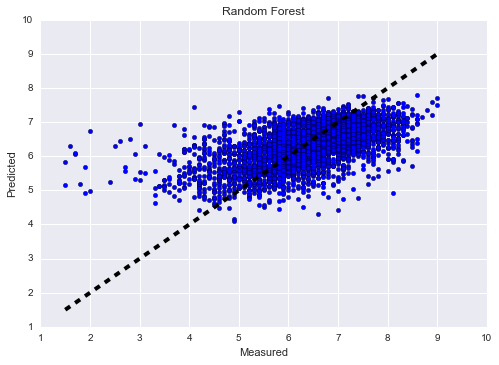

In [155]:
y_tested,y_predicted =  test(RFR)
fig, ax = plt.subplots()
ax.scatter(y_tested, y_predicted)
ax.plot([y_tested.min(), y_tested.max()], [y_tested.min(), y_tested.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Random Forest')
plt.show()

In [29]:
clf = RandomForestRegressor(n_estimators=3,max_depth = 3)
clf.fit(df.ix[:,9:].loc[:9000], df.RATING.loc[:9000])
for i, tree in enumerate(clf.estimators_):
    export_graphviz(tree, out_file = "tree"+str(i)+".dot")
    check_call(['dot','-Tpng','tree'+str(i)+'.dot','-o','tree'+str(i)+'.png'])

In [88]:
importances = RFR.feature_importances_

In [89]:
std = np.std([tree.feature_importances_ for tree in RFR.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

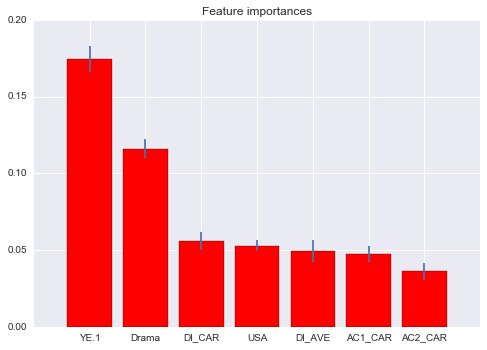

In [90]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,7), importances[indices[:7]],
       color="r", yerr=std[indices[:7]], align="center")
plt.xticks(range(0,7), names[indices[:7]+8])
plt.xlim([-1, 7])
plt.show()

In [91]:
def compare(film):
    print ("RATING : ")
    print(df.loc[df.MV==film].RATING.item())
    print("PREDICT :")
    print(RFR.predict(df.loc[df.MV==film].ix[:,8:]))

In [93]:
compare("Vertigo")

RATING : 
8.4
PREDICT :
[ 7.87700238]


## 2.4. XGBoost

In [95]:
parameters = {"n_estimators" : [100,120], "max_depth" : [6,8], "learning_rate" : [0.1,0.2,0.3],
              "subsample" : [0.8,1], "colsample_bytree" : [0.8,1]}

In [97]:
reg = XGBRegressor()

In [98]:
clf = GridSearchCV(estimator=reg, param_grid=parameters, scoring = score, verbose = 2)

In [99]:
clf.fit(df.ix[:,8:],df.RATING)        

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 -   7.5s
[CV] n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV]  n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 -   7.0s
[CV] n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=100, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 -   7.0s
[CV] n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 -   6.8s
[CV] n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 -   7.6s
[CV] n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=100, colsample_bytree=0.8, subsample=1, learning_rate=0.1, max_depth=6 -   7.0s
[CV] n_estimators=120, colsample_bytree=0.8, subsample=0.8, learning_rate=0.1, max_depth=6 
[CV]  n_estimators=120, colsample_bytree=0.8, s

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 79.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 120], 'learning_rate': [0.1, 0.2, 0.3], 'subsample': [0.8, 1], 'colsample_bytree': [0.8, 1], 'max_depth': [6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function score at 0x000000CE41489510>, verbose=2)

In [101]:
clf.best_score_, clf.best_estimator_

(0.37123229352238096,
 XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
        gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
        min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=0.8))

In [145]:
reg = XGBRegressor()

In [146]:
parameters2 = {"n_estimators" : [80,120], "max_depth" : [5,6], "learning_rate" : [0.05,0.1,0.15],
              "subsample" : [0.7,0.8], "colsample_bytree" : [1]}

In [147]:
clf = GridSearchCV(estimator=reg, param_grid=parameters2, scoring = score, verbose = 2)

In [148]:
clf.fit(df.ix[:,8:],df.RATING)        

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 -   5.6s
[CV] n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 -   5.8s
[CV] n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=80, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 -   6.2s
[CV] n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 -   6.0s
[CV] n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 -   6.5s
[CV] n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=80, colsample_bytree=1, subsample=0.8, learning_rate=0.05, max_depth=5 -   5.7s
[CV] n_estimators=120, colsample_bytree=1, subsample=0.7, learning_rate=0.05, max_depth=5 
[CV]  n_estimators=120, colsample_bytree=1, subsample=

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 31.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [80, 120], 'learning_rate': [0.05, 0.1, 0.15], 'subsample': [0.7, 0.8], 'colsample_bytree': [1], 'max_depth': [5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function score at 0x000000CE44C18B70>, verbose=2)

In [149]:
clf.best_score_, clf.best_estimator_

(0.37693684131652089,
 XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=5,
        min_child_weight=1, missing=None, n_estimators=120, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=0.8))

In [150]:
XGBR = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=5,
        min_child_weight=1, missing=None, n_estimators=120, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [151]:
score(XGBR,df.ix[:,8:],df.RATING)

0.36484217847047518

In [158]:
y_tested,y_predicted = test(XGBR)

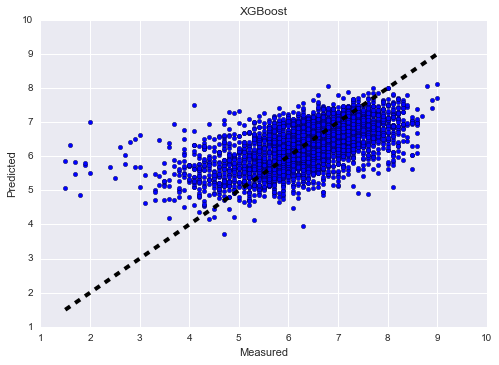

In [159]:
fig, ax = plt.subplots()
ax.scatter(y_tested, y_predicted)
ax.plot([y_tested.min(), y_tested.max()], [y_tested.min(), y_tested.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('XGBoost')
plt.show()

C:\Users\AGNES\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


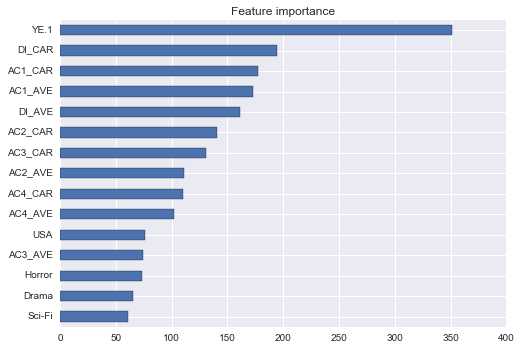

In [161]:
features = names[8:]
ts = pd.Series(XGBR.booster().get_fscore())
ts.order().tail(15).plot(kind="barh", title=("Feature importance"))